In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

## K-Means clustering from scratch
For this I have made use of titanic dataset from kaggle

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataMining/Assignmnet4/Dataset/train.csv')

In [ ]:
cluster_data = df[['Fare','Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['Fare','Age'], inplace=True)
cluster_array = np.array(cluster_data)

In [ ]:
print(cluster_array[0:10])

[[ 0.     19.    ]
 [ 0.     25.    ]
 [ 0.     36.    ]
 [ 0.     38.    ]
 [ 0.     39.    ]
 [ 0.     40.    ]
 [ 0.     49.    ]
 [ 4.0125 20.    ]
 [ 5.     33.    ]
 [ 6.2375 61.    ]]


In [ ]:
# Calculate Euclidean distance between two observations
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [ ]:
# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [ ]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [ ]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [ ]:
k = 4
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 507874
1 259347
2 229172
3 182890
4 145160
5 128549
6 120822
7 111083
8 108858
9 108504
10 108219
11 107999
12 107851
13 107678
14 107171
15 106905
16 106818
17 106803
18 106799
19 106798
20 106796


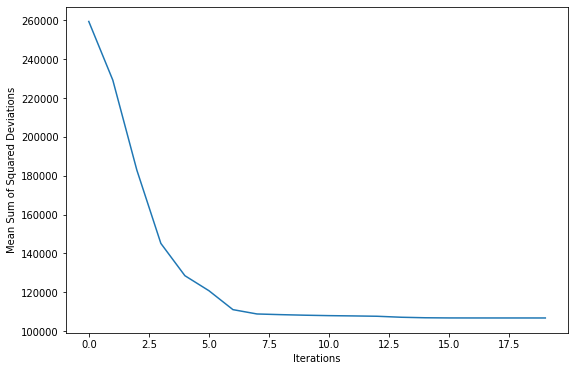

In [ ]:
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd', bpi=150)

As the number of itertaions increases the root mean square also decreases

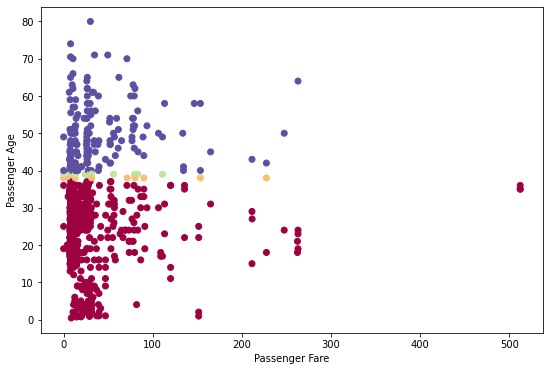

In [ ]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.savefig('initial_clusters', bpi=150)

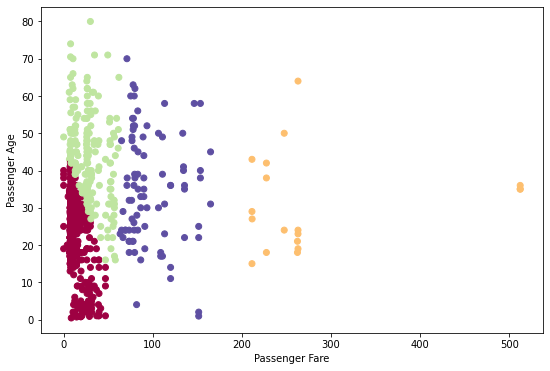

In [ ]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.savefig('final_clusters', bpi=150)

For the final clusters the demarkation boundry is clearly defined between the clusters

### Hierarchical clustering (not from scratch)



In [ ]:
df=df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


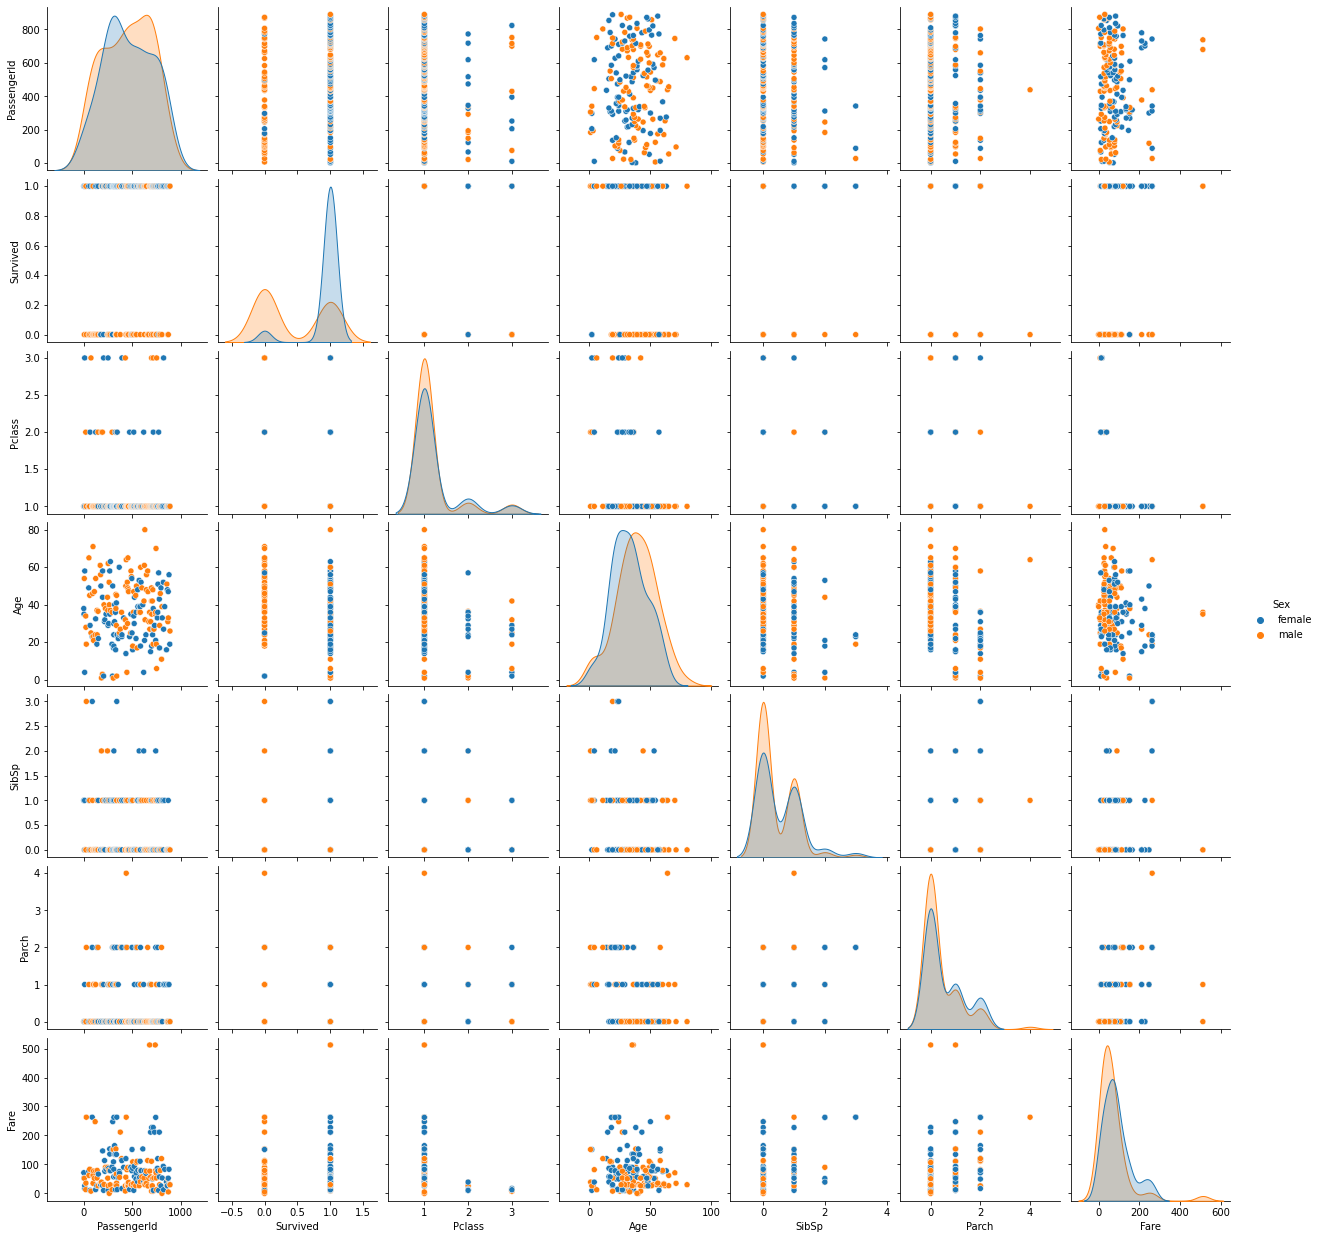

In [ ]:
sns.pairplot(df,hue = "Sex")


In [ ]:
df_selected=df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df_selected)
data_scaled = pd.DataFrame(data_scaled, columns=df_selected.columns)
data_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.012377,0.012377,0.470309,0.012377,0.000000,0.882241
1,0.015718,0.015718,0.550134,0.015718,0.000000,0.834632
2,0.000000,0.013355,0.721173,0.000000,0.000000,0.692626
3,0.057083,0.171250,0.228333,0.057083,0.057083,0.953290
4,0.015673,0.015673,0.909039,0.000000,0.000000,0.416121


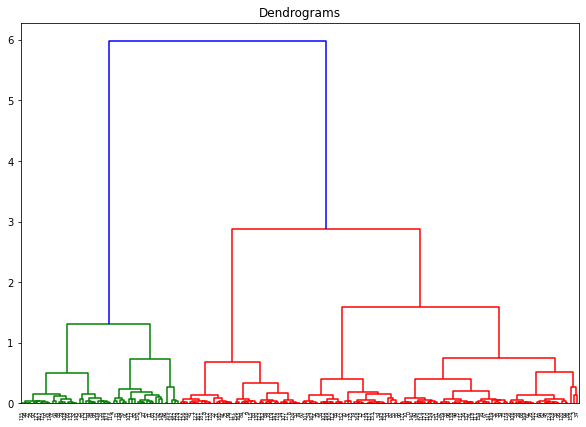

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

From the above dendrodram we can find that predicting the survivor depends on many factors

## Gaussian mixture models clustering

In [ ]:
from sklearn.mixture import GaussianMixture as GMM


In [ ]:
data_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.012377,0.012377,0.470309,0.012377,0.000000,0.882241
1,0.015718,0.015718,0.550134,0.015718,0.000000,0.834632
2,0.000000,0.013355,0.721173,0.000000,0.000000,0.692626
3,0.057083,0.171250,0.228333,0.057083,0.057083,0.953290
4,0.015673,0.015673,0.909039,0.000000,0.000000,0.416121


In [ ]:
x=data_scaled.drop("Survived", axis=1)
x=x.values

In [ ]:
n_components = [1,2,3,4,5,6,7,8,9,10]
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]

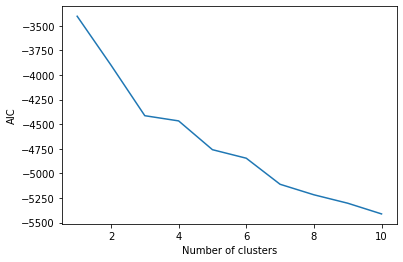

In [ ]:
aics = [model.fit(x).aic(x) for model in models]
plt.plot(n_components, aics)
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.show()

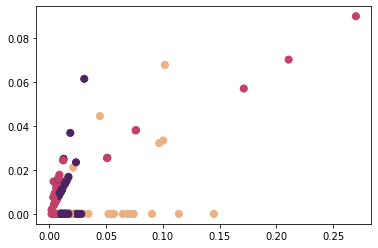

In [ ]:
gmm = GMM(n_components=3, covariance_type='full', random_state=0).fit(x)
labels = gmm.predict(x)
plt.scatter(x[:, 0], x[:, 3], c=labels, s=50, cmap='flare')

probs = np.argmax(gmm.predict_proba(x), axis=1)

GMM only performs well with linear structures

## DB Scan clustering (not from scratch) using pycaret library 

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(x)


DBSCAN(eps=0.4, min_samples=20)

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

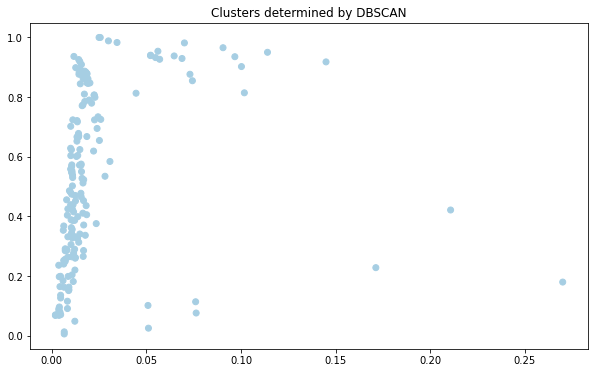

In [ ]:
y_pred = db.fit_predict(x)
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

DB Scan was not able to clearly define the boundries